# 3ª AP de Aprendizado de Máquina

Professor: Regis Pires Magalhães

#### Observações:
- Primeiramente faça uma cópia backup deste arquivo sem suas resoluções.
- A sétima questão vale 1 ponto. As demais questões valem 1,5.
- Desconecte o cabo de rede do computador.
- Somente é permitida consulta à documentação contida na pasta mldocs.
- Não é permitido o uso de pendrive ou qualquer outro meio de armazenamento externo de dados.
- Ao concluir a avaliação, altere o nome do notebook para conter a matricula e o nome do aluno. Somente depois disso, chame o professor para entregar sua resolução, que deverá ser copiada para o pendrive do professor.
- Sempre que possível, use seed ou random_state = 42.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn import datasets 
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

## Carregue o dataset ds.csv, que infelizmente não possui label. No entanto, podemos usar técnicas de aprendizado supervisionado para gerar os labels. Desse modo, faça o que se pede:

In [2]:
ds = pd.read_csv('ds.csv')
ds.head()

,0,1
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 2 columns):
0    788 non-null float64
1    788 non-null float64
dtypes: float64(2)
memory usage: 12.4 KB


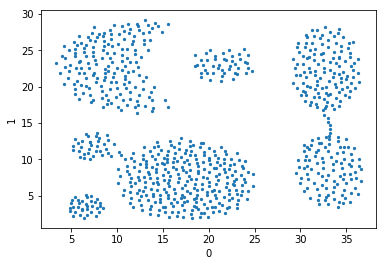

In [4]:
ds.plot(x=0, y=1, kind='scatter', marker='.');

## 1. Gere labels de ds usando: K_Means com k=7. Exiba um scatterplot  de ds, onde cada cluster é representado por uma cor distinta.

In [5]:
km = KMeans(n_clusters=7)
result = km.fit_predict(ds.values)

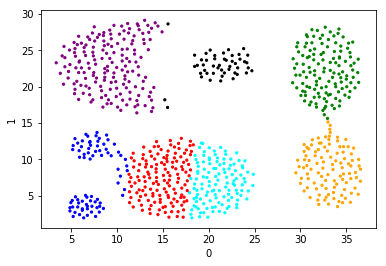

In [6]:
colors = np.array(['blue', 'green', 'purple', 'cyan', 'orange', 'red', 'black'])
ds.plot(x=0, y=1, kind='scatter', marker='.', c=colors[result]);

## 2. Gere labels de ds usando: Clusterização Hierarquica com n_estimators = 7 e método de linkage single. Exiba um scatterplot de ds, onde cada cluster é representado por uma cor distinta.

In [7]:
dense_matrix = hierarchy.distance.pdist(ds.values, metric='euclidean')
model = hierarchy.linkage(dense_matrix, method='single')
y = hierarchy.cut_tree(model, n_clusters=7)

In [8]:
y = y.reshape(788,)

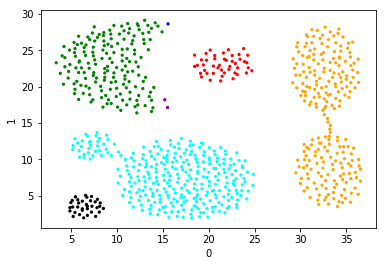

In [9]:
ds.plot(x=0, y=1, kind='scatter', marker='.', c=colors[y]);

## 3. Gere labels de ds usando: DBSCAN com eps=1.5 e min_samples=3. . Exiba um scatterplot de ds, onde cada cluster é representado por uma cor distinta.

NO - Visualmente qual o melhor e o pior resultado de clusterização dentre os requisitados nas questões 1 a 3? 
Explique sua resposta.

In [10]:
db = DBSCAN(eps=1.5, min_samples=3)
result = db.fit_predict(ds.values)

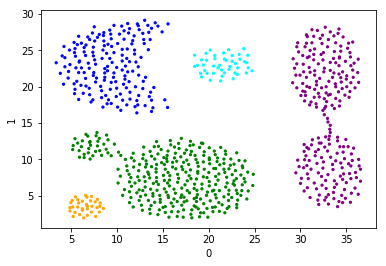

In [11]:
ds.plot(x=0, y=1, kind='scatter', marker='.', c=colors[result]);

## 4. Dado que um cluster tem somente os pontos [1,2], [3,2], [7,5], qual o centróide do cluster?

In [12]:
# O ponto médio entre eles três...

In [13]:
(1 + 3 + 7) / 3,  (2 + 2 + 5) / 3

(3.6666666666666665, 3.0)

## 5. Gini é uma medida de impureza muito usada para geração de árvores de decisão e dada pela fórmula: 

$$ I_G = 1 - \sum_{i=1}^c p(i|t)^2 $$
onde $p(i|t)$ é a proporção de amostras de uma classe $i$ em um nó $t$.

## Calcule gini onde $gini = ?$ na figura a seguir:

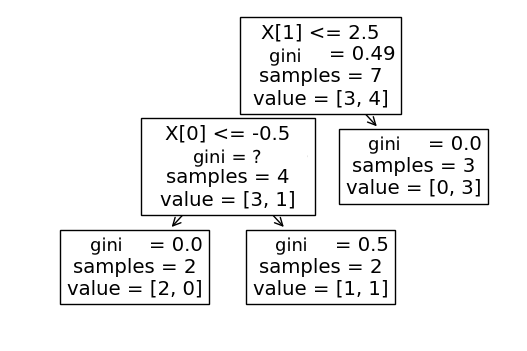

## A árvore de decisão acima foi construída a partir do seguinte dataset:


In [14]:
X= np.array([[2,3], [-4,0], [1,1], [1,1], [-2,2], [2,7], [0,3]])
y = np.array([0, 1, 1, 0, 1, 0, 0])

In [15]:
1 - (( ( 3 / ( 3+1 ) )**2 ) + ( ( 1 / ( 1+3 ) )**2 ))

0.375

## 6. Dado o dataset a seguir, obtenha o RMSE ($RMSE = \sqrt{(MSE)}$) sobre os dados de teste, comparando DecisionTree, Random Forest e Gradient Boosting com seus parâmetros padrão, mas com random_state=42. Use 80% dos dados para treino e 20% para teste. 

In [16]:
X, y = datasets.load_diabetes(return_X_y=True)

In [17]:
models = {}
models['dt'] = DecisionTreeRegressor(random_state=42)
models['rf'] = RandomForestRegressor(random_state=42)
models['gb'] = GradientBoostingRegressor(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

rmse = {}
pred = {}
for key in models:
    models[key].fit(X_train, y_train)
    pred[key] = models[key].predict(X_test)
    rmse[key] = (mse(pred[key], y_test))**(1/2)

/home/aluno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
rmse

{'dt': 70.61829663921893, 'rf': 56.07654680098977, 'gb': 53.783890298224456}

podemos observar que o gradient boosting obteve o melhor resultado, pois seu RMSE foi o menor.

## 7. Mostre a importância das features ordenando da feature mais importante até a menos importante para o modelo que obteve melhor desempenho na questão 6. 

In [20]:
fi = pd.DataFrame(models['gb'].feature_importances_)
fi.sort_values(by=0, ascending=False)

,0
2,0.392691
8,0.250453
3,0.082786
5,0.061422
0,0.049612
9,0.046518
4,0.038892
6,0.036320
7,0.028827
1,0.012478
